# Fábrica Inteligente Sustentável

## Exercício Integrador – Ciência de Dados com Python

Este exercício integra as principais bibliotecas estudadas (NumPy, Pandas, Matplotlib, Seaborn,
Scikit-learn e TensorFlow) em um contexto prático do setor industrial e energético. O objetivo é
criar um protótipo de sistema especialista de apoio à decisão para otimizar o consumo de energia
elétrica com base nos dados de produção de uma fábrica.


## Instalação de Dependências

In [29]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


Could not find platform independent libraries <prefix>


## Importação de Bibliotecas


In [31]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## 1. Manipulação de Dados (Pandas + NumPy)

- Ler o arquivo `fabrica_energia.csv`.
- Calcular média, desvio padrão e total de energia consumida por máquina.
- Identificar o dia com maior e menor produção.


In [2]:
print("=" * 40)
print("Manipulação de Dados (Pandas + NumPy)")
print("=" * 40)

# Leitura do arquivo CSV
df = pd.read_csv("fabrica_energia.csv")

# Agrupamento por Máquina e Cálculo de Estatísticas
dados_maquina = (
    df.groupby("maquina")
    .agg(
        {
            "consumo_kwh": ["mean", "std", "sum", "count"],
            "unidades_produzidas": ["mean", "sum"],
            "horas_trabalhadas": ["mean", "sum"],
        }
    )
    .round(2)
)

# Média de Energia Consumida por Máquina
media_energia = dados_maquina["consumo_kwh"]["mean"]

# Desvio Padrão de Energia Consumida por Máquina
desvio_padrao_energia = dados_maquina["consumo_kwh"]["std"]

# Total de Energia Consumida por Máquina
total_energia = dados_maquina["consumo_kwh"]["sum"].round(2)

# Dia com Maior Produção
dia_maior_producao = df.loc[df["unidades_produzidas"].idxmax()]["dia"]

# Dia com Menor Produção
dia_menor_producao = df.loc[df["unidades_produzidas"].idxmin()]["dia"]

# Exibir Resultados
print("\n" + "-" * 40)
print("Estatísticas por Máquina:")
print("-" * 40)
# Iterar por máquina e imprimir resultados de forma legível
for maquina in dados_maquina.index:
    print(f"\nMáquina: {maquina}")
    media = (
        media_energia.loc[maquina]
        if hasattr(media_energia, "loc")
        else media_energia[maquina]
    )
    desvio = (
        desvio_padrao_energia.loc[maquina]
        if hasattr(desvio_padrao_energia, "loc")
        else desvio_padrao_energia[maquina]
    )
    total = (
        total_energia.loc[maquina]
        if hasattr(total_energia, "loc")
        else total_energia[maquina]
    )
    print(f"Média de Energia Consumida: {media} kWh")
    print(f"Desvio Padrão de Energia: {desvio} kWh")
    print(f"Total de Energia Consumida: {total} kWh")
print(f"\nDia com Maior Produção: Dia {dia_maior_producao}")
print(f"Dia com Menor Produção: Dia {dia_menor_producao}")

Manipulação de Dados (Pandas + NumPy)

----------------------------------------
Estatísticas por Máquina:
----------------------------------------

Máquina: A
Média de Energia Consumida: 269.0 kWh
Desvio Padrão de Energia: 38.47 kWh
Total de Energia Consumida: 1345 kWh

Máquina: B
Média de Energia Consumida: 330.0 kWh
Desvio Padrão de Energia: 22.36 kWh
Total de Energia Consumida: 1650 kWh

Dia com Maior Produção: Dia 6
Dia com Menor Produção: Dia 5


## 2. Visualização (Matplotlib + Seaborn)

- Criar um gráfico de dispersão (horas trabalhadas × consumo energético).
- Criar um gráfico de linha (consumo energético ao longo dos dias).


Visualização (Matplotlib + Seaborn)


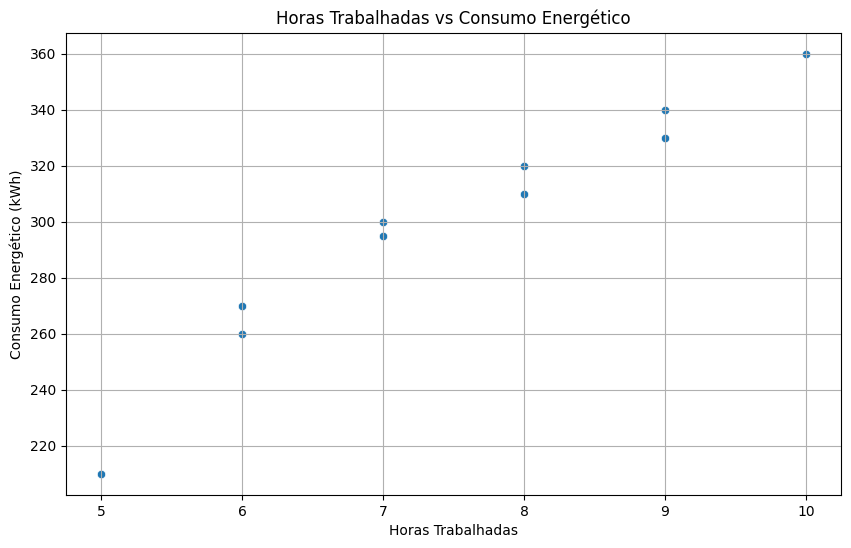

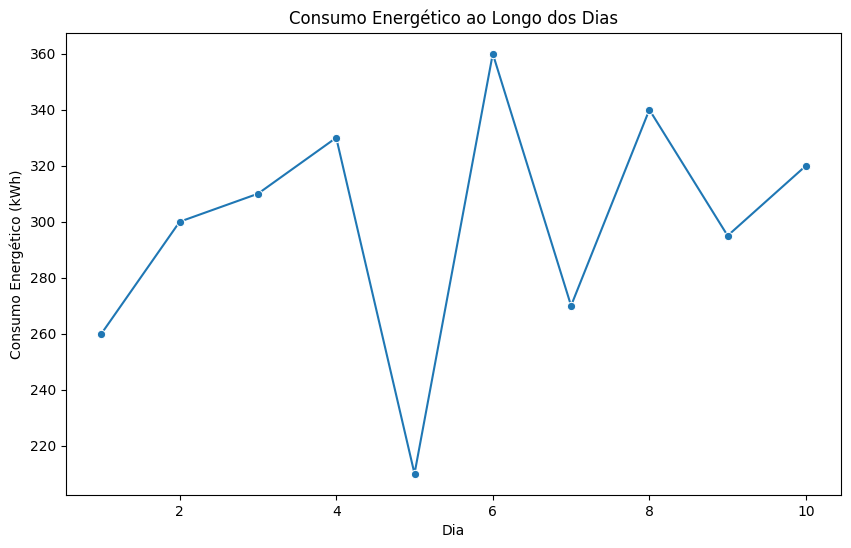

In [3]:
print("=" * 40)
print("Visualização (Matplotlib + Seaborn)")
print("=" * 40)

# Gráfico de Dispersão (Horas Trabalhadas × Consumo Energético)
plt.pyplot.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="horas_trabalhadas", y="consumo_kwh")
plt.pyplot.title("Horas Trabalhadas vs Consumo Energético")
plt.pyplot.xlabel("Horas Trabalhadas")
plt.pyplot.ylabel("Consumo Energético (kWh)")
plt.pyplot.grid()
plt.pyplot.show()

# Gráfico de Linha (Consumo Energético ao Longo dos Dias)
plt.pyplot.figure(figsize=(10, 6))
sns.lineplot(data=df, x="dia", y="consumo_kwh", marker="o")
plt.pyplot.title("Consumo Energético ao Longo dos Dias")
plt.pyplot.xlabel("Dia")
plt.pyplot.ylabel("Consumo Energético (kWh)")
plt.pyplot.show()

## 3. Classificação (Scikit-learn)

- Adicionar coluna `alto_consumo` (1 se consumo_kwh > média).
- Treinar modelo DecisionTreeClassifier com entradas `horas_trabalhadas` e `unidades_produzidas`.


3. Classificação (Scikit-learn)
Média de Consumo para Classificação: 299.5 kWh

Acurácia do Modelo: 87.50%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8



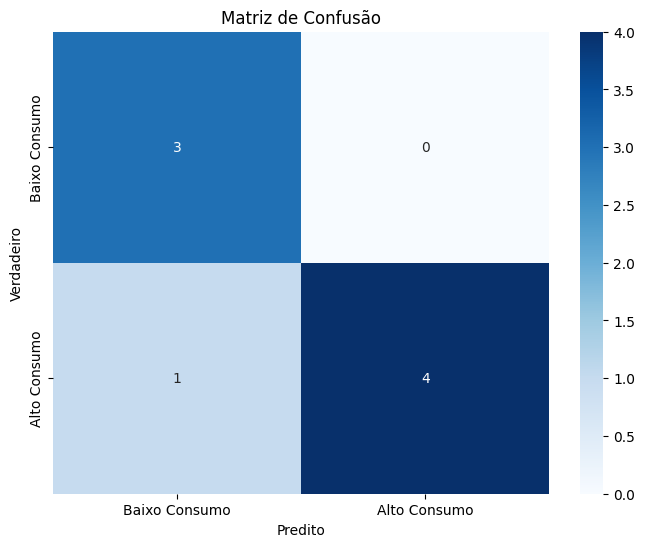

In [27]:
print("=" * 40)
print("3. Classificação (Scikit-learn)")
print("=" * 40)

# Adicionando coluna 'alto_consumo' com base na média
media_consumo = df["consumo_kwh"].mean()
df["alto_consumo"] = (df["consumo_kwh"] > media_consumo).astype(int)
print(f"Média de Consumo para Classificação: {media_consumo.round(2)} kWh")

# Treinamento do Modelo de Classificação (DecisionTreeClassifier)
X = df[["horas_trabalhadas", "unidades_produzidas"]]
y = df["alto_consumo"]

# Divisão dos Dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Criação e Treinamento do Modelo
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Fazendo Previsões
y_pred = model.predict(X_test)

# Avaliação do Modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do Modelo: {accuracy:.2%}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.pyplot.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Baixo Consumo", "Alto Consumo"],
    yticklabels=["Baixo Consumo", "Alto Consumo"],
)
plt.pyplot.title("Matriz de Confusão")
plt.pyplot.xlabel("Predito")
plt.pyplot.ylabel("Verdadeiro")
plt.pyplot.show()


## 4. Predição (TensorFlow)

- Criar uma rede neural simples para prever `consumo_kwh` com base nas variáveis de produção.
- Usar duas camadas ocultas e ativação ReLU.

In [ ]:
print("=" * 40)
print("4. Redes Neurais (TensorFlow)")
print("=" * 40)

# Normalização dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.8, random_state=42
)

# Construção do Modelo de Rede Neural
nn_model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)),
        Dropout(0.3),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(1),
    ]
)

# Compilação do Modelo
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=["mae"],
)

# Treinamento do Modelo Final
final_model = nn_model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5),
    ],
    verbose=1,
)

# Avaliação do Modelo
loss, mae = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nAvaliação do Modelo de Rede Neural - MAE: {mae:.4f}")
# Fazendo Previsões
y_nn_pred = nn_model.predict(X_test_scaled)
y_nn_pred_class = (y_nn_pred > 0.5).astype(int)

# Relatório de Classificação
print("\nRelatório de Classificação da Rede Neural:")
print(classification_report(y_test, y_nn_pred_class))

4. Redes Neurais (TensorFlow)
Epoch 1/100


c:\Users\Micro\Desktop\Faculdade\4UBD\FabricaInteligente\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0644 - mae: 0.1976 - val_loss: 0.5048 - val_mae: 0.6456 - learning_rate: 0.0010
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3199 - mae: 0.5013 - val_loss: 0.4906 - val_mae: 0.6367 - learning_rate: 0.0010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2681 - mae: 0.3696 - val_loss: 0.4800 - val_mae: 0.6277 - learning_rate: 0.0010
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2260 - mae: 0.4391 - val_loss: 0.4639 - val_mae: 0.6139 - learning_rate: 0.0010
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.7376 - mae: 0.8439 - val_loss: 0.4462 - val_mae: 0.5978 - learning_rate: 0.0010
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2765 - mae: 0.4227 - val_loss: 0.4273 - val_mae: 0.5805 - learning_rate: 0.0010
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0772 - mae: 0.2137 - val_loss: 0.4100 - val_mae: 0.5642 - learning_rate: 0.0010
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━